#Nick Staich

(Core) Project 1 Revisited: Importances and Coefficients
Task
For this assignment, you will revisit your first project to predict supermarket sales. You will apply what you've learned this week to explain how your models made their predictions.
Project 1 Revisited - Part 1: Remaking, Saving, and Explaining Your Models
For this part of the project, you will be producing a new version of your final project notebook using the updated tools in sklearn v1.1. 

Create a new notebook called "Project 1 - Revisited.ipynb" in your project repo.
You may either make a copy of your prior notebook that you will modify,
or you can start a new blank notebook and copy over the code from your old notebook (as needed).
Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.
LinearRegression
Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
Extract and visualize the coefficients that your model determined.
Select the top 3 most impactful features and interpret their coefficients in plain English.
Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
Tree-Based Model
Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.
Extract and visualize the feature importances that your model determined.
Identify the top 5 most important features.
Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).
Serialize Your Best Models with Joblib
Once you've finished updating and explaining your models, you must save the following key: value pairs as a dictionary in a joblib file named "best-models.joblib":
"preprocessor": your preprocessing  column transformer
"X_train": your training features.
"X_test": your test features.
"y_train": your training target.
"y_test": your test target.
"LinearRegression": your best linear regression
Your tree-based model's class name: your best tree-based model.
e.g. "RandomForestRegressor"/"DecisionTreeRegressor"
Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)
Update your README.
Insert your exported figures from above into your README file. You should have the following:
Your LinearRegression coefficients plot.
 Your interpretation of your coefficients.
Your tree-based model's feature importances.
Your interpretation of your feature importances. 


Submit the link to your project repository as your final submission.

# Imports and Data Load

In [2]:
#Verify appropriate version of Python and SciKitLearn are running for proper functionality
# SciKitLearn version >=1.1.3
# Python >=3.9.15

import sklearn
print (f"sklearn version: {sklearn.__version__}")
!python --version

sklearn version: 1.1.3
Python 3.9.15


In [3]:
#Load Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load Standard processing imports
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
#Load modeling and evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.inspection import permutation_importance
import joblib
#Set random state for reproducibility
SEED = 321 
np.random.seed(SEED)
#set pandas to display more columns
pd.set_option('display.max_columns',50)
#set pandas to eliminate scientific notation
#pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

# Load Data Set

Loading the Supermarket Analysis data set to glean important information focusing on Sales as a funtion of other operational factors such as Item, Outlet Type, and Item Visibility.

In [4]:
filename = r'Data\sales_predictions.csv'

df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Evaluate DataFrame 

In [5]:
#Quick Function for EDA analysis (proper EDA should still be conducted)

def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
        'dtype':df.dtypes,
        '# null': df.isna().sum(),
        'null %': df.isna().sum()/len(df)*100,
        'nunique': df.nunique(),
        'min':df.min(),
        'max':df.max()        
    })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)

C:\Users\staichn\AppData\Local\Temp\ipykernel_30376\1971790721.py:10: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'min':df.min(),
C:\Users\staichn\AppData\Local\Temp\ipykernel_30376\1971790721.py:11: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'max':df.max()


,Column,dtype,# null,null %,nunique,min,max
0,Item_Fat_Content,object,0,0.000000,5,LF,reg
1,Item_Identifier,object,0,0.000000,1559,DRA12,NCZ54
2,Item_MRP,float64,0,0.000000,5938,31.29,266.8884
3,Item_Outlet_Sales,float64,0,0.000000,3493,33.29,13086.9648
4,Item_Type,object,0,0.000000,16,Baking Goods,Starchy Foods
5,Item_Visibility,float64,0,0.000000,7880,0.0,0.328391
6,Item_Weight,float64,1463,17.165317,415,4.555,21.35
7,Outlet_Establishment_Year,int64,0,0.000000,9,1985,2009
8,Outlet_Identifier,object,0,0.000000,10,OUT010,OUT049
9,Outlet_Location_Type,object,0,0.000000,3,Tier 1,Tier 3


# Customize plotting options

In [6]:
#Plotting Customization Options
plt.style.use(('classic','dark_background'))
sns.set_context(context='notebook', font_scale=1.2)
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['figure.facecolor']='black'

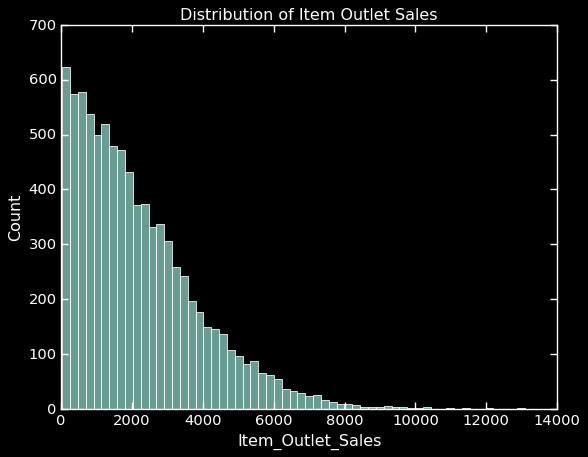

In [7]:
#Verify plotting options
ax = sns.histplot(data=df, x='Item_Outlet_Sales');
ax.set_title("Distribution of Item Outlet Sales")
plt.savefig('Images/dist_outlet_sales.png')

# Begin Data Processing and Prep for Modeling

In [8]:
# Make x and y variables
y = df['Item_Outlet_Sales'].copy()
X = df.drop(columns=['Item_Outlet_Sales']).copy()

#stratify=X_test_items, 
# Train-Test-Split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8269           FDI60        7.220          Regular         0.064142   
7604           DRD25        6.135               LF         0.079294   
2762           NCP18       12.150          Low Fat         0.028593   
6464           NCS30        5.945               LF         0.093009   
4707           FDI08       18.200          Regular         0.066285   
...              ...          ...              ...              ...   
3482           FDL44          NaN          Low Fat         0.012216   
8360           FDA34       11.500          Low Fat         0.014884   
5929           NCU30        5.110          Low Fat         0.034945   
4220           FDX47        6.550          Regular         0.034800   
6682           DRG49        7.810          Low Fat         0.067730   

                  Item_Type  Item_MRP Outlet_Identifier  \
8269           Baking Goods   61.2510            OUT010   

In [9]:
# Make categorical selector and verify it works

cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
#Make numeric selector and verify it works

num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [11]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown = 'ignore', min_frequency=0.010,  sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [12]:

preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe, cat_sel),
                                      verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F7E26F1580>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=0.01,
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F7E2D7ABE0>)],
                  verbose_feature_names_out=False)

In [13]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_infrequent_sklearn',
       'Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Item_Type_infrequent_sklearn', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT04

In [14]:
#Create a preprocessed Dataframe for our training set using the pulled out feature names and original X_train

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_infrequent_sklearn,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Type_infrequent_sklearn,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.220,0.064142,61.2510,1998.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,6.135,0.079294,111.2860,2009.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,12.150,0.028593,151.0708,2004.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,5.945,0.093009,127.8652,2004.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,18.200,0.066285,247.2092,2004.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# Create the pre-processed DataFrame for the test set.

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                        columns = feature_names, index = X_test.index)
X_test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_infrequent_sklearn,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Type_infrequent_sklearn,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,15.250000,0.061531,132.2968,2007.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2391,17.850000,0.044463,127.1020,1997.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
163,7.270000,0.071078,114.2518,1997.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4608,12.822634,0.075142,145.8444,1985.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5544,13.500000,0.121633,161.6920,1998.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [16]:
# Confirm the head of y_test still matches up with X_test_df

y_test.head()

8077    1696.4584
2391    2024.0320
163     2618.5914
4608    3773.7544
5544     159.7920
Name: Item_Outlet_Sales, dtype: float64

In [17]:
# Create a custom function for regression evaluation

def evaluate_regression(model, X_train, y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    # Training data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                           squared=False)
    
    print(f"Training Data:\tR^2 = {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
    
    # Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                          squared=False)
    
    print(f"Test Data: \tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [18]:
# Run a regression model and check that the evaluation function runs correctly

lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2 = 0.56	RMSE= 1114.87
Test Data: 	R^2= 0.56	RMSE= 1164.39


In [19]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [20]:
coeffs = get_coeffs_linreg(lin_reg)
coeffs

Outlet_Type_Grocery Store            -1.089558e+03
Outlet_Identifier_OUT010             -6.200715e+02
Outlet_Identifier_OUT019             -4.694860e+02
Item_Visibility                      -2.798400e+02
Outlet_Identifier_OUT045             -2.066023e+02
Outlet_Location_Type_Tier 1          -1.409973e+02
Item_Type_Soft Drinks                -1.171952e+02
Outlet_Identifier_OUT013             -8.349956e+01
Outlet_Size_High                     -8.349956e+01
Item_Fat_Content_reg                 -7.627139e+01
Item_Type_Household                  -6.867316e+01
Item_Type_Dairy                      -4.939516e+01
Outlet_Size_Small                    -4.580712e+01
Item_Type_Health and Hygiene         -4.137776e+01
Item_Fat_Content_LF                  -2.789757e+01
Outlet_Establishment_Year            -1.848263e+01
Item_Type_Meat                       -1.568124e+01
Item_Type_Snack Foods                -1.148237e+01
Item_Type_Breads                     -6.188674e+00
Item_Type_Frozen Foods         

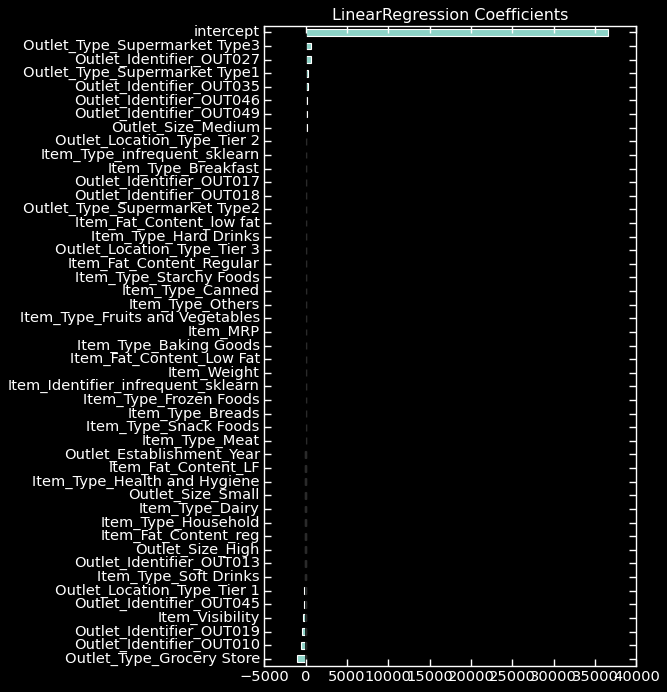

In [21]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');

In [22]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

intercept                             47.0
Outlet_Type_Grocery Store             46.0
Outlet_Type_Supermarket Type3         45.0
Outlet_Identifier_OUT027              44.0
Outlet_Identifier_OUT010              43.0
Outlet_Identifier_OUT019              42.0
Outlet_Type_Supermarket Type1         41.0
Item_Visibility                       40.0
Outlet_Identifier_OUT035              39.0
Outlet_Identifier_OUT045              38.0
Outlet_Identifier_OUT046              37.0
Outlet_Location_Type_Tier 1           36.0
Outlet_Identifier_OUT049              35.0
Outlet_Size_Medium                    34.0
Item_Type_Soft Drinks                 33.0
Outlet_Location_Type_Tier 2           32.0
Item_Type_infrequent_sklearn          31.0
Outlet_Identifier_OUT013              30.0
Outlet_Size_High                      29.0
Item_Fat_Content_reg                  28.0
Item_Type_Household                   27.0
Item_Type_Breakfast                   26.0
Outlet_Identifier_OUT017              25.0
Outlet_Iden

In [23]:
top_n_features = coeff_rank.head(10)
top_n_features

intercept                        47.0
Outlet_Type_Grocery Store        46.0
Outlet_Type_Supermarket Type3    45.0
Outlet_Identifier_OUT027         44.0
Outlet_Identifier_OUT010         43.0
Outlet_Identifier_OUT019         42.0
Outlet_Type_Supermarket Type1    41.0
Item_Visibility                  40.0
Outlet_Identifier_OUT035         39.0
Outlet_Identifier_OUT045         38.0
dtype: float64

In [24]:
## Slicing out the top_n_features names to visualize
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

intercept                        36622.534908
Outlet_Type_Grocery Store        -1089.557516
Outlet_Type_Supermarket Type3      683.965064
Outlet_Identifier_OUT027           683.965064
Outlet_Identifier_OUT010          -620.071505
Outlet_Identifier_OUT019          -469.486011
Outlet_Type_Supermarket Type1      342.051428
Item_Visibility                   -279.839968
Outlet_Identifier_OUT035           235.404518
Outlet_Identifier_OUT045          -206.602299
dtype: float64

In [25]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Type_Grocery Store        -1089.557516
Outlet_Identifier_OUT010          -620.071505
Outlet_Identifier_OUT019          -469.486011
Item_Visibility                   -279.839968
Outlet_Identifier_OUT045          -206.602299
Outlet_Location_Type_Tier 1       -140.997330
Item_Type_Soft Drinks             -117.195239
Outlet_Size_Medium                 129.306681
Outlet_Identifier_OUT049           140.214310
Outlet_Identifier_OUT046           188.274371
Outlet_Identifier_OUT035           235.404518
Outlet_Type_Supermarket Type1      342.051428
Outlet_Identifier_OUT027           683.965064
Outlet_Type_Supermarket Type3      683.965064
intercept                        36622.534908
dtype: float64

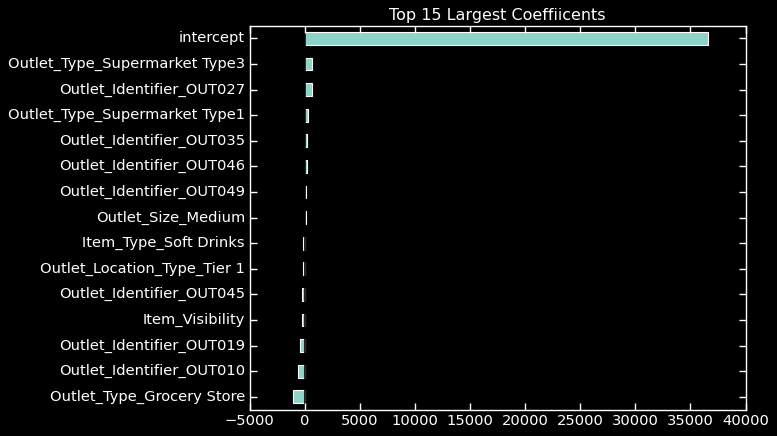

In [26]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

In [27]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax

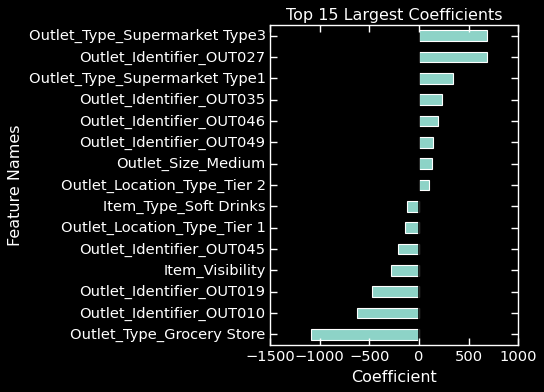

In [28]:
## Testing our function with intercept=False (the default)
ax= plot_coeffs(coeffs,top_n=15)

In [29]:
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

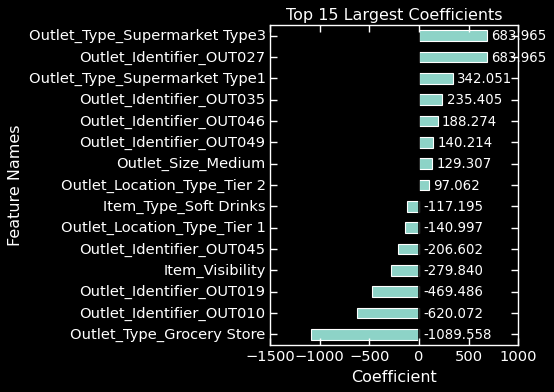

In [30]:
ax = plot_coeffs(coeffs,top_n=15)
annotate_hbars(ax)
plt.savefig('Images/sales_lin_reg_coeffs.png')

![png](Images/sales_lin_reg_coeffs.png)


<img src='Images/sales_lin_reg_coeffs.png' width=50%>

In [31]:
## creating a dictionary of all of the variables to save for later from linear regression model
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'LinearRegression':lin_reg}
joblib.dump(export, 'lin_reg_proj1a.joblib')

['lin_reg_proj1a.joblib']

# Regression Tree Model
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model. Compare the performance of your model based on r^2. Compare the performance of your model based on rmse.

In [32]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [33]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 423.04
Test Data:	R^2= 0.56	RMSE= 1166.98


In [34]:
feature_importance = pd.Series(reg.feature_importances_, index=feature_names,
                        name='Random Forest Regression Feature Importances')
feature_importance.head()

Item_Weight                           0.052132
Item_Visibility                       0.095624
Item_MRP                              0.441817
Outlet_Establishment_Year             0.026454
Item_Identifier_infrequent_sklearn    0.000000
Name: Random Forest Regression Feature Importances, dtype: float64

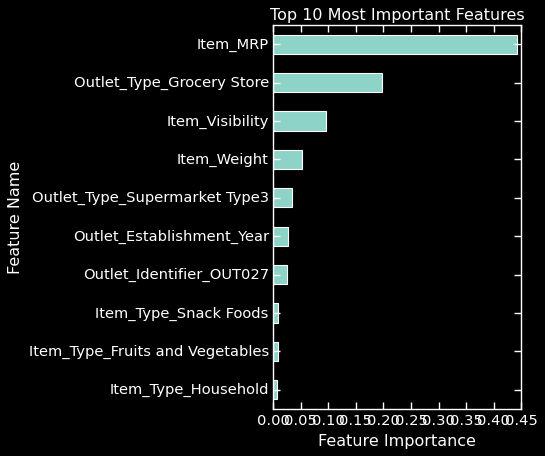

In [35]:
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

In [36]:
feature_importance.sort_values(ascending=False).head(4)

Item_MRP                     0.441817
Outlet_Type_Grocery Store    0.196758
Item_Visibility              0.095624
Item_Weight                  0.052132
Name: Random Forest Regression Feature Importances, dtype: float64

In [37]:
#Reassemble DataFrame for plotting and EDA analysis
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_infrequent_sklearn,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Type_infrequent_sklearn,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
8269,7.220,0.064142,61.2510,1998.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,126.5020
7604,6.135,0.079294,111.2860,2009.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2263.7200
2762,12.150,0.028593,151.0708,2004.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2858.9452
6464,5.945,0.093009,127.8652,2004.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2195.8084
4707,18.200,0.066285,247.2092,2004.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3486.1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,12.850,0.033247,172.4422,2002.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4483.4972
5323,17.250,0.037338,163.7526,2009.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3289.0520
22,14.600,0.025698,196.5084,2004.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1587.2672
4526,13.850,0.034766,114.2492,2007.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1853.5872


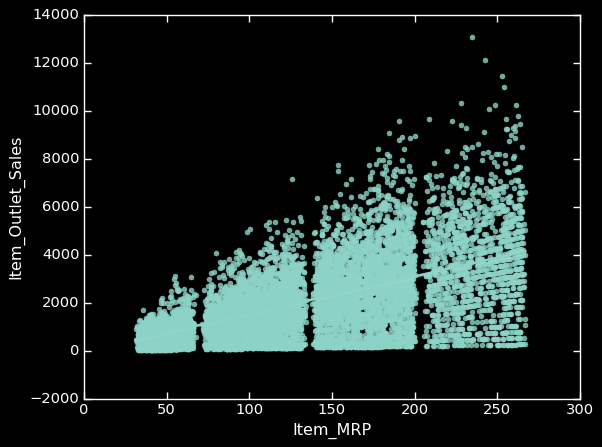

In [47]:
sns.regplot(data=plot_df, x='Item_MRP',y='Item_Outlet_Sales');
plt.savefig('Images/item_mrp_to_outlet_sales.png')

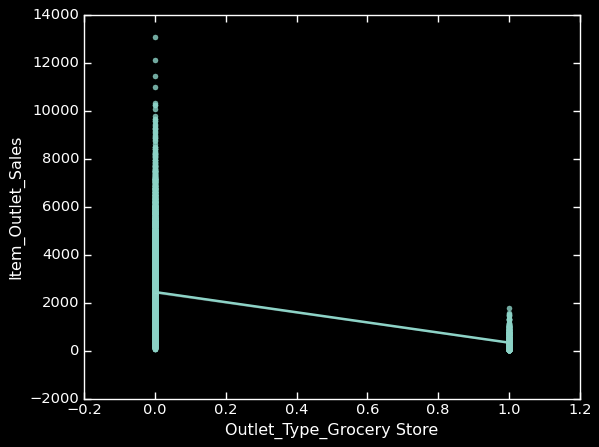

In [48]:
sns.regplot(data=plot_df, x='Outlet_Type_Grocery Store',y='Item_Outlet_Sales');
plt.savefig('Images/outlet_type_grocery_store_to_outlet_sales.png')

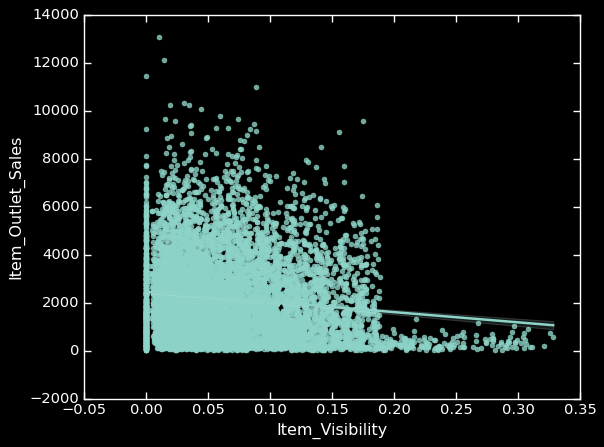

In [49]:
sns.regplot(data=plot_df, x='Item_Visibility',y='Item_Outlet_Sales');
plt.savefig('Images/item_visibility_to_outlet_sales.png')

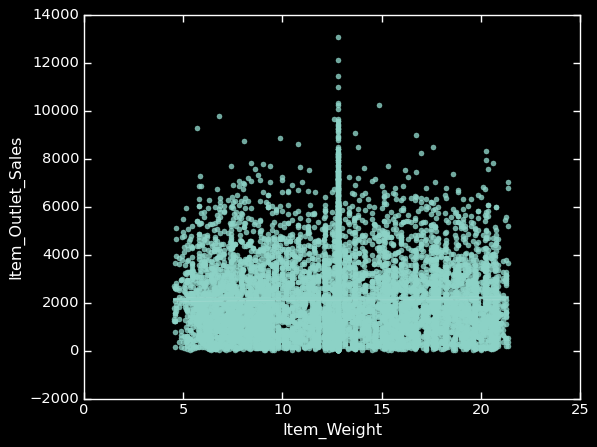

In [50]:
sns.regplot(data=plot_df, x='Item_Weight',y='Item_Outlet_Sales');
plt.savefig('Images/item_weight_to_outlet_sales.png')

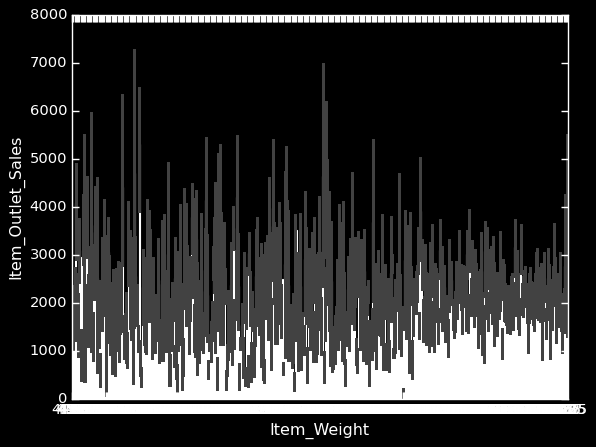

In [42]:
sns.barplot(data=plot_df, x='Item_Weight',y='Item_Outlet_Sales');

In [43]:
## can make the mean importances into a series

r = permutation_importance(reg, X_train_df, y_train ,n_repeats =5)
r.keys()

perm_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
perm_importances.head()

Item_Weight                           0.099300
Item_Visibility                       0.175669
Item_MRP                              1.099099
Outlet_Establishment_Year             0.051451
Item_Identifier_infrequent_sklearn    0.000000
Name: permutation importance, dtype: float64

In [44]:
def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

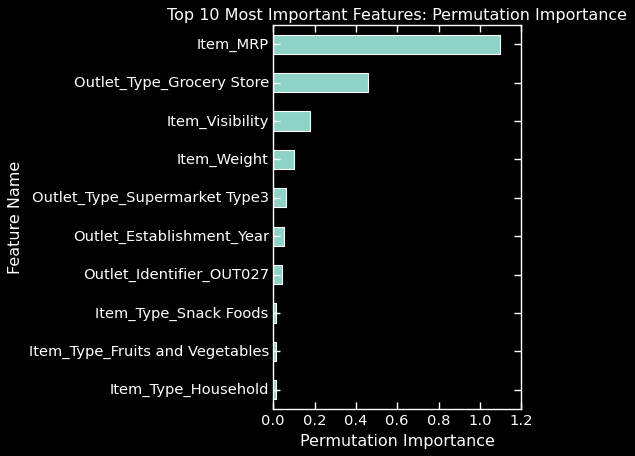

In [51]:
ax = perm_importances.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Permutation Importance',
       title='Top 10 Most Important Features: Permutation Importance');
plt.savefig('Images/reg_perm_importances.png')

In [46]:
## creating a dictionary of all of the variables to save for later from linear regression model
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForestRegression':reg}
joblib.dump(export, 'reg_proj1a.joblib')

['reg_proj1a.joblib']

Executive summary:

Looked into all available data features for those impactful via a high correlation, and reoved the others.
